# Prosper Loan Data Investigation
## by BOUDISSA Mohamed Nourelhak

## Investigation Overview
Prosper is a peer-to-peer lending service where you micro-invest amounts as small as 25 USD in other user's loans, in this investigation we will be focussing to answer these two questions:
- **Who is using Prosper?**<br>
The main characteristics of Prosper users: the state they live in, their Occupation, their employment status, their income,
and if they own a home or not.
- **Did Prosper users successfully accomplished their debts?**<br>
The probability of a loan to be completed based on the previos characteristics.

## Dataset Overview
Prosper Loan Dataset contains 113937 loans with tons of informations about each loan (81 features) like ('ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus'...), we will be using only few of them in our inverstigation. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

base_color = sb.color_palette()[0]
fontdict={'fontsize': 12, 'fontweight': 'bold'}
title = {'fontsize': 18, 'fontweight': 'bold'}
def resize_plot(size):
    ''' resize the figure '''
    plt.figure(figsize = size)

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ProsperDataClean.csv')
df2 = pd.read_csv('ProsperFinishedLoans.csv')

# Who is using Prosper?

## Employment Status

The majority of the users are Employed (more than 85%) and about 5% are self-employed, there is 7% of the users which we don't know their employment status, and a very very small proportion of the users are either Not employed or Retired.

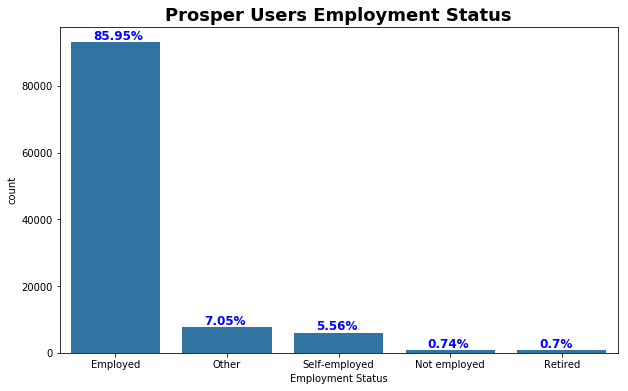

In [21]:
resize_plot([10,6])
sb.countplot(data = df, x = 'EmploymentStatus', color = base_color, order = df.EmploymentStatus.value_counts().index)
props = df.EmploymentStatus.value_counts().values/df.EmploymentStatus.count();
for i in range(5):
    plt.text(i-0.2,df.EmploymentStatus.value_counts()[i]+2000,str(round(props[i]*100,2))+'%',va = 'center', color='b',
             fontdict=fontdict);
plt.xlabel('Employment Status')
plt.title('Prosper Users Employment Status', fontdict=title);

## Occupation

In total there are 66 different Occupations. We don't know the occupation for 27% of the users under the category 'Other'.<br>
Here are the top 15 Occupations with their proportions, more than 50% of the users are in the top 15 Occupations which means that the 51 remaining Occupations are constituting a small proportion (about 13%).

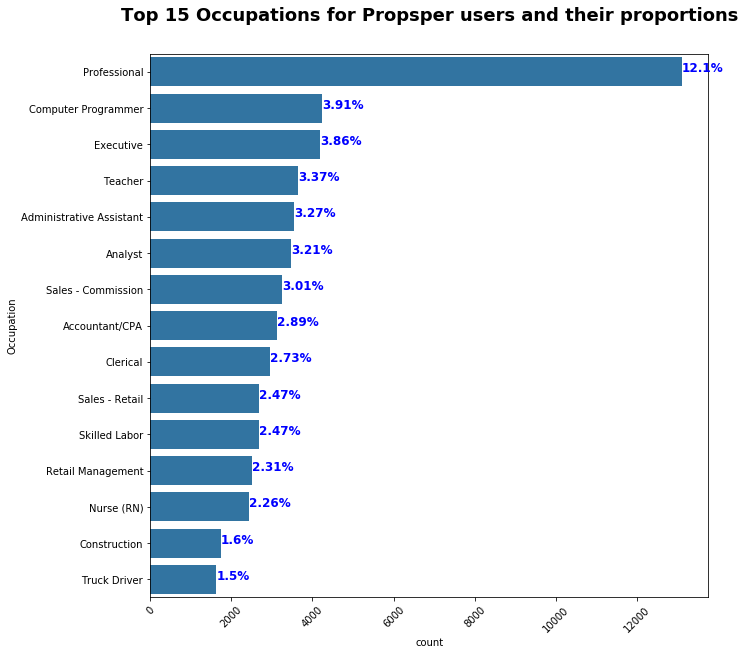

In [4]:
props = df['Occupation'].value_counts().iloc[1:16].values/df.Occupation.count()
resize_plot([10,10])
sb.countplot(data = df, y = 'Occupation', color = base_color, order=df['Occupation'].value_counts().iloc[1:16].index)
plt.xticks(rotation = 45)
plt.title('Top 15 Occupations for Propsper users and their proportions', fontdict=title).set_position([.5, 1.05])
for i in range (15):
    plt.text(df['Occupation'].value_counts().iloc[1:16][i], i,  str(round(props[i]*100, 2))+'%', fontdict=fontdict, color='b')

## Homeownership

The number of borrowers that are homeowners is a little bit greater than the number of borrowers that are not homeowners.

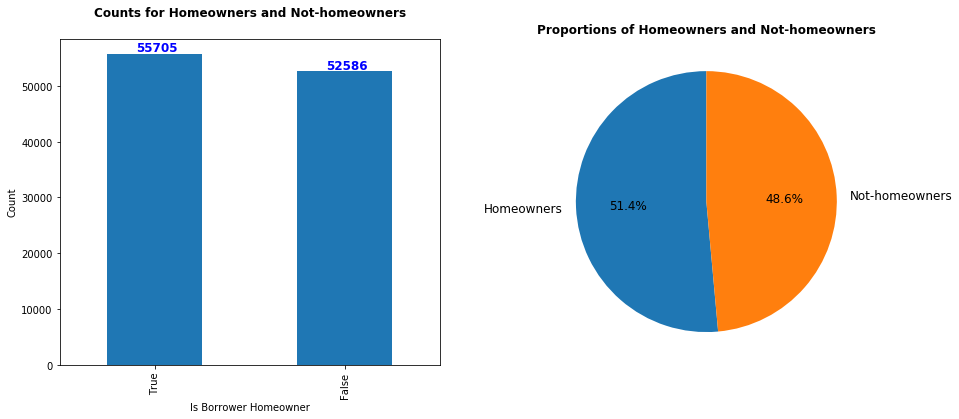

In [24]:
resize_plot([15,6])
plt.subplot(1,2,1)
#sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color)
counts = df.IsBorrowerHomeowner.value_counts()
counts.plot(kind='bar')
plt.title('Counts for Homeowners and Not-homeowners', fontdict=fontdict).set_position([.5,1.05])
plt.ylabel('Count')
plt.xlabel('Is Borrower Homeowner')
plt.text(0-0.1, counts[True]+500, str(counts[True]), fontdict=fontdict, color='b')
plt.text(1-0.1, counts[False]+500, str(counts[False]), fontdict=fontdict, color='b')
plt.subplot(1,2,2)
x = round((df.IsBorrowerHomeowner.value_counts()/df.IsBorrowerHomeowner.count())*100, 2)
#explode = (0.01, 0.01)
#textprops={'size': 18.0}
plt.title('Proportions of Homeowners and Not-homeowners', fontdict=fontdict)
labels = ['Homeowners', 'Not-homeowners']
plt.pie(x = x, labels = labels, startangle = 90, autopct='%1.1f%%', textprops={'size': 12.0});

# IncomeRange
90% of the data is centered in the 4 middle income ranges going from 25-49,99 to +100 dollars, we have 3.6% of the users which we don't know the Income Range, and about 1% of the users are either not-employed or with 0 income.

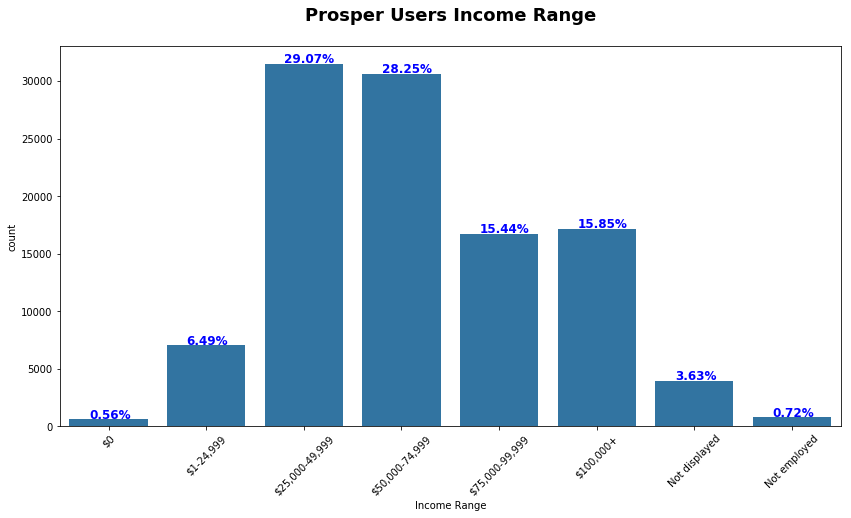

In [20]:
df.IncomeRange = df.IncomeRange.astype('category')
df.IncomeRange = df.IncomeRange.cat.reorder_categories(['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
       '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed'])
props = df.IncomeRange.value_counts()/df.IncomeRange.count()
resize_plot([14,7])
sb.countplot(data = df, x ='IncomeRange', color = base_color)
plt.xticks(rotation = 45)
plt.xlabel('Income Range')
plt.title('Prosper Users Income Range', fontdict=title).set_position([.5, 1.05])
for i in range(8):
    plt.text(i-0.2,df.IncomeRange.value_counts()[i]+100, str(round(props[i]*100,2))+'%', fontdict=fontdict, color='b')

# Did Prosper users successfully accomplished their debts?

## Loan Status
Before moving to see how the users finished their loans based on their characteristics we must see how the loans tend to end in general

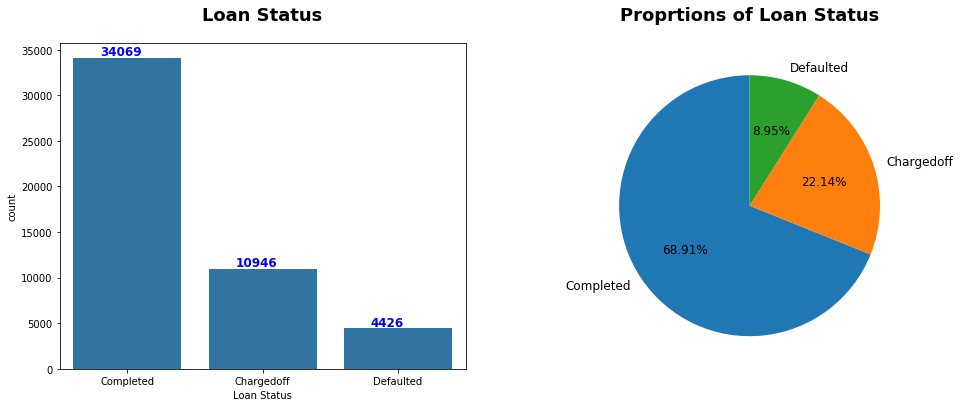

In [25]:
resize_plot([16,6])
plt.subplot(1,2,1)
sb.countplot(data = df2, x = 'LoanStatus', color = base_color, order = df2['LoanStatus'].value_counts().index)
plt.xlabel('Loan Status')
plt.title('Loan Status', fontdict=title).set_position([.5,1.05])
for i in range(3):
    plt.text(i-0.2, df2.LoanStatus.value_counts()[i]+300, str(df2.LoanStatus.value_counts()[i]), fontdict=fontdict, color='b')
plt.subplot(1,2,2)
# proportions
x = round((df2.LoanStatus.value_counts()/df2.LoanStatus.count())*100, 2)
plt.title('Proprtions of Loan Status', fontdict=title).set_position([.5,1.05])
plt.pie(x = x.values, labels = x.index, startangle = 90, autopct='%1.2f%%', textprops={'size':'12'});

# Distribution of Prosper Rating
Prosper rating is a measurement of risque, ratings are going from AA (7) which is the highest rating and it means the lower risque, to the lower rating HR (1) and it means High Risque. Our data is normally distributed and centered around C in the middle dividing loans with high risque and loans with low risque.

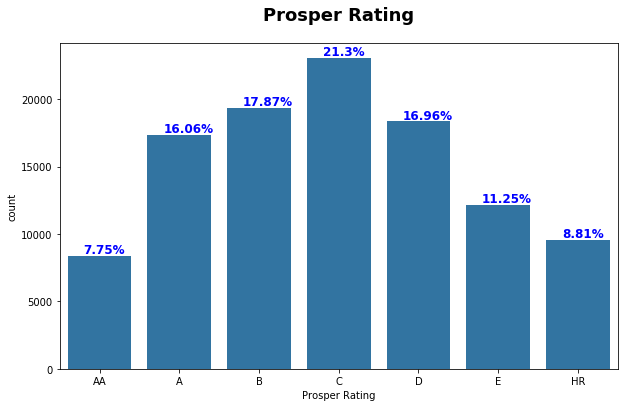

In [26]:
df.ProsperRating_Alpha = pd.Categorical(df.ProsperRating_Alpha, categories=["AA", "A", "B", "C", "D", "E", "HR"], ordered=True)
resize_plot([10,6])
sb.countplot(data = df, x = 'ProsperRating_Alpha', color = base_color);
plt.xlabel('Prosper Rating')
plt.title('Prosper Rating', fontdict=title).set_position([.5, 1.05])
props = df.ProsperRating_Alpha.value_counts()/df.ProsperRating_Alpha.count()
i = 0
for c in df.ProsperRating_Alpha.cat.categories:
    plt.text(i-0.2, df.ProsperRating_Alpha.value_counts()[c]+200, str(round(props[i]*100, 2))+'%', fontdict=fontdict, color='b')
    i = i+1

# Prosper Rating vs. Loan Staus
Plotting the LoanStatus by ProsperRating shows how does the Rating affects the probability of a loan to be completed,
this probability decreases as the rating decreases (the risque increases).

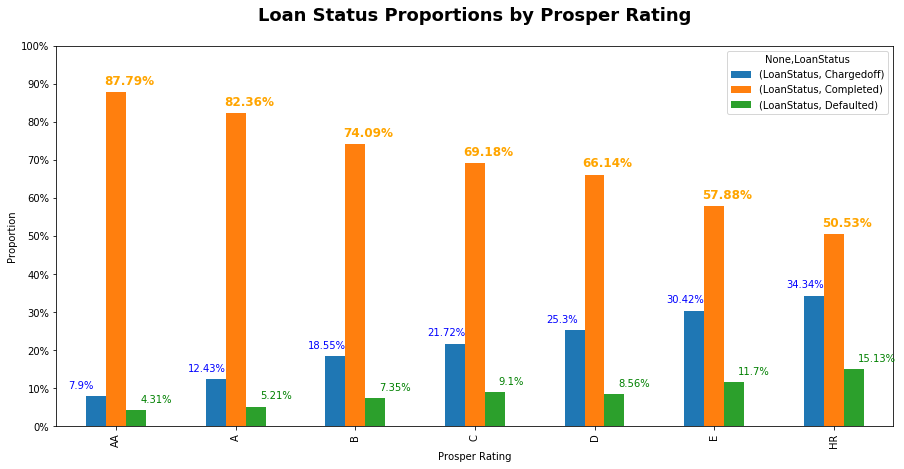

In [27]:
df2.ProsperRating_Alpha = pd.Categorical(df2.ProsperRating_Alpha, categories=["AA", "A", "B", "C", "D", "E", "HR"], ordered=True)
props = df2.groupby(df2.ProsperRating_Alpha).LoanStatus.value_counts()/df2.groupby(df2.ProsperRating_Alpha).LoanStatus.count()
props = pd.DataFrame(props)
props.unstack(level=1).plot(kind='bar', figsize = [15,7])
for i in range(7):
    plt.text(i-0.4,props.unstack(level=1).values[i][0]+0.02,str(round(props.unstack(level=1).values[i][0]*100,2))+'%', color='b')
    plt.text(i-0.1,props.unstack(level=1).values[i][1]+0.02,str(round(props.unstack(level=1).values[i][1]*100,2))+'%', color='orange', fontdict=fontdict)
    plt.text(i+0.2,props.unstack(level=1).values[i][2]+0.02,str(round(props.unstack(level=1).values[i][2]*100,2))+'%', color='g')

plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
           ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%',]);
plt.ylabel('Proportion')
plt.xlabel('Prosper Rating')
plt.title('Loan Status Proportions by Prosper Rating', fontdict=title).set_position([.5,1.05]);

# Income Range vs. Loan Status
Plotting the LoanStatus by IncomeRagne shows us how the IncomeRange affects the probability of completion and we can say that people with high income range are likely to complete their loans, because while the income range is getting higher the proportion of completed loans is getting higher.

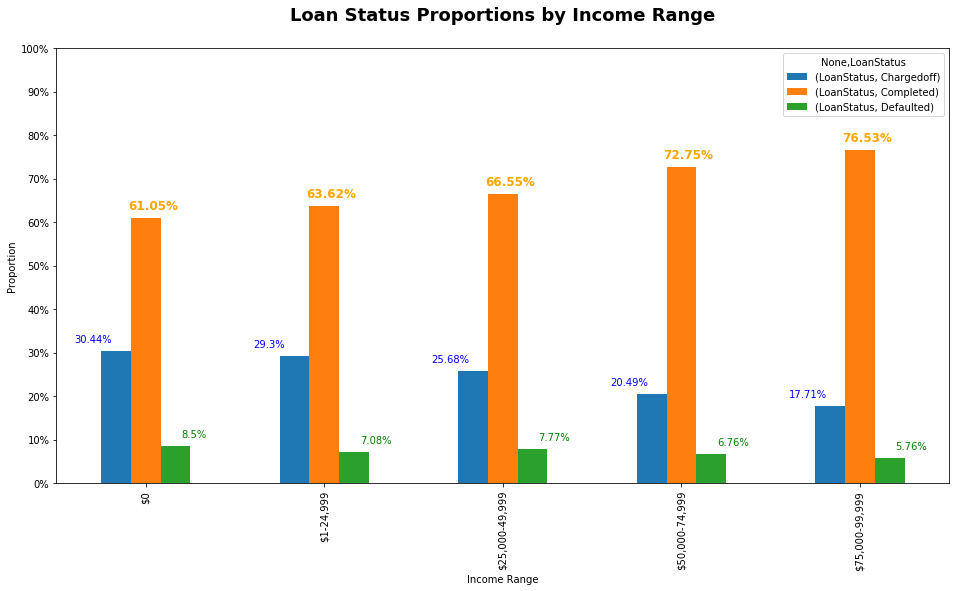

In [18]:
df2.IncomeRange = pd.Categorical(df2.IncomeRange, categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
       '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed'], ordered=True)
props = df2.groupby(df2.IncomeRange).LoanStatus.value_counts()/df2.groupby(df2.IncomeRange).LoanStatus.count()
props = pd.DataFrame(props)
props.unstack(level=1).iloc[:5].plot(kind='bar', figsize = [16,8])
for i in range(5):
    plt.text(i-0.4,props.unstack(level=1).values[i][0]+0.02,str(round(props.unstack(level=1).values[i][0]*100,2))+'%', color='b')
    plt.text(i-0.1,props.unstack(level=1).values[i][1]+0.02,str(round(props.unstack(level=1).values[i][1]*100,2))+'%', color='orange', fontdict=fontdict)
    plt.text(i+0.2,props.unstack(level=1).values[i][2]+0.02,str(round(props.unstack(level=1).values[i][2]*100,2))+'%', color='g')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
           ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%',]);
plt.ylabel('Proportion')
plt.xlabel('Income Range')
plt.title('Loan Status Proportions by Income Range', fontdict=title).set_position([.5, 1.05]);

# Loan Status by Employment Status
Does the Employment Status affect the probability of completion? we can say yes, and the Employed and Retired users are likely to complete their loans.

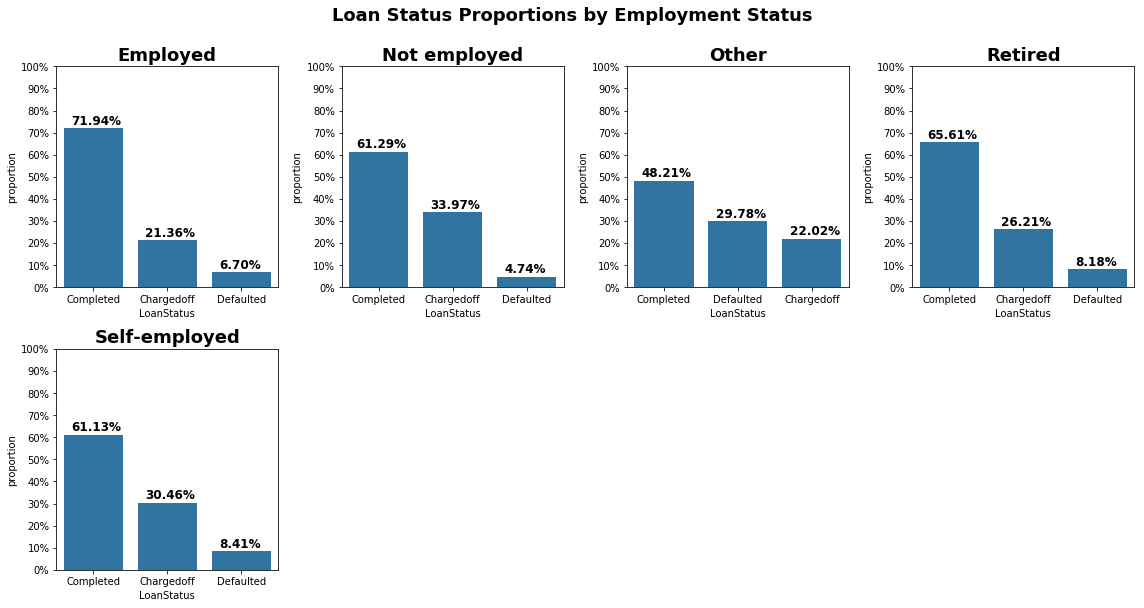

In [11]:
df2.EmploymentStatus = df2.EmploymentStatus.astype('category')
resize_plot([16,8])
i=1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('Loan Status Proportions by Employment Status', fontsize=18, fontweight = 'bold').set_position([.5,1.05])
for c in df2['EmploymentStatus'].cat.categories:
    plt.subplot(2,4,i)
    n_points = df2[df2['EmploymentStatus'] == c].shape[0]
    sb.countplot(data=df2[df2['EmploymentStatus']== c], x = 'LoanStatus', color = base_color,
                 order = df2[df2['EmploymentStatus']== c].LoanStatus.value_counts().index)
    
    plt.yticks(np.arange(0, 1.05, 0.1) * n_points, ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])

    # print proportions
    counts = df2[df2['EmploymentStatus']== c]['LoanStatus'].value_counts()
    props = counts/df2[df2['EmploymentStatus']== c].shape[0]
    for j in range(3):
        y = str('{:0.2f}'.format(props[j]*100)) + '%'
        plt.text(j-0.3, counts[j]+np.mean(counts)/10, y, va = 'center', color='black', fontdict={'fontsize': 12, 'fontweight': 'bold'});
    plt.ylabel('proportion')
    plt.title(c, fontdict=title)
    plt.tight_layout()
    i += 1

# Homeownership vs. Loan Status
How does Homeownership affect the Loan Status?<br>
It seems like Homeowners are doing better than Not-homeowners at completing loans but not by much.

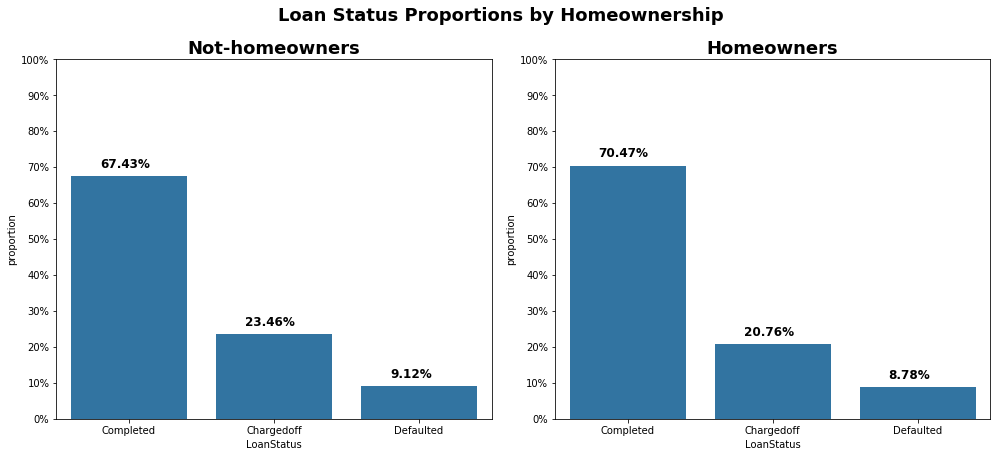

In [12]:
resize_plot([14,6])
i=1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('Loan Status Proportions by Homeownership', fontsize=18, fontweight = 'bold').set_position([.5,1.05])
for c in df2['IsBorrowerHomeowner'].value_counts().index:
    plt.subplot(1,2,i)
    n_points = df2[df2['IsBorrowerHomeowner'] == c].shape[0]
    sb.countplot(data=df2[df2['IsBorrowerHomeowner']== c], x = 'LoanStatus', color = base_color,
                 order = df2[df2['IsBorrowerHomeowner']== c].LoanStatus.value_counts().index)
    
    plt.yticks(np.arange(0, 1.05, 0.1) * n_points, ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])

    # print proportions
    counts = df2[df2['IsBorrowerHomeowner']== c]['LoanStatus'].value_counts()
    props = counts/df2[df2['IsBorrowerHomeowner']== c].shape[0]
    for j in range(3):
        y = str('{:0.2f}'.format(props[j]*100)) + '%'
        plt.text(j-0.2, counts[j]+np.mean(counts)/10, y, va = 'center', color='black', fontdict={'fontsize': 12, 'fontweight': 'bold'});
    plt.ylabel('proportion')
    plt.title('Homeowners' if c == True else 'Not-homeowners', fontdict=title)
    plt.tight_layout()
    i += 1

# Homeownership vs. Prosper Rating
Homeowners are having a higher rating which means lower risque while Not-homeowners are having low ratings (high risque).

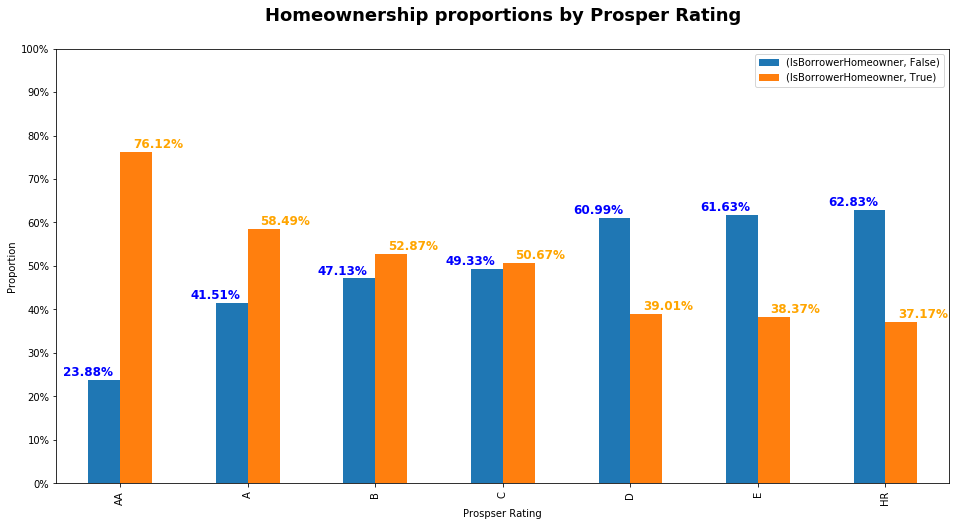

In [19]:
p = (df2.groupby('ProsperRating_Alpha').IsBorrowerHomeowner.value_counts()/df2.groupby('ProsperRating_Alpha').IsBorrowerHomeowner.count())
p = pd.DataFrame(p)
p.unstack(level = 1).plot(kind = 'bar', figsize=[16,8])
plt.xlabel('Prospser Rating')
plt.ylabel('Proportion')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
           ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%',])
plt.title('Homeownership proportions by Prosper Rating', fontdict=title).set_position([.5,1.05])
plt.legend(loc = 'best')
for i in range(7):
    plt.text(i-0.45, p.unstack(level = 1).iloc[i][0]+0.01, str(round(p.unstack(level = 1).iloc[i][0]*100,2))+'%', fontdict=fontdict, color='b')
    plt.text(i+0.1, p.unstack(level = 1).iloc[i][1]+0.01, str(round(p.unstack(level = 1).iloc[i][1]*100,2))+'%', fontdict=fontdict, color='orange')

## Prosper Rating and Homeownership by Loan Status
Bringing these three variables together consolidate our previous findings which say that Completed loans have a higher rating compared to other loan statuses and homeowners have a higher possibility to complete the loans and they have a higher rating compared to Not-homeowners.

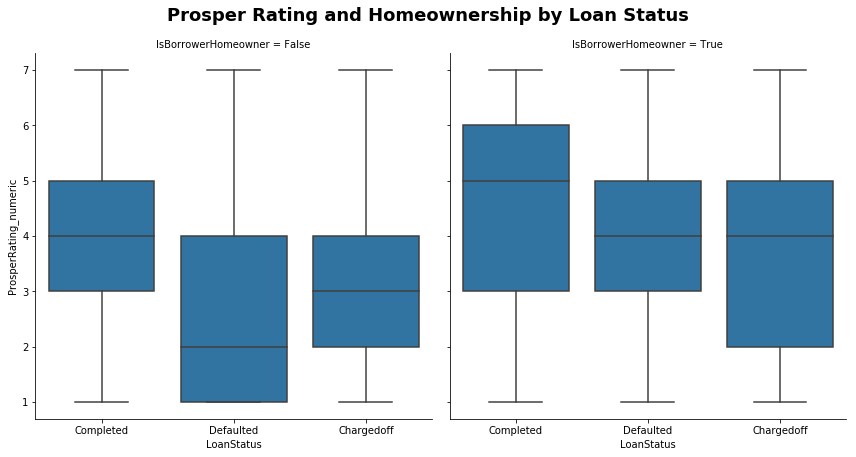

In [14]:
g = sb.FacetGrid(data = df2, col = 'IsBorrowerHomeowner', height = 6)
g.map(sb.boxplot, 'LoanStatus', 'ProsperRating_numeric', order = None)
g.fig.suptitle('Prosper Rating and Homeownership by Loan Status', fontsize=18, fontweight='bold').set_position([.5, 1.05]);

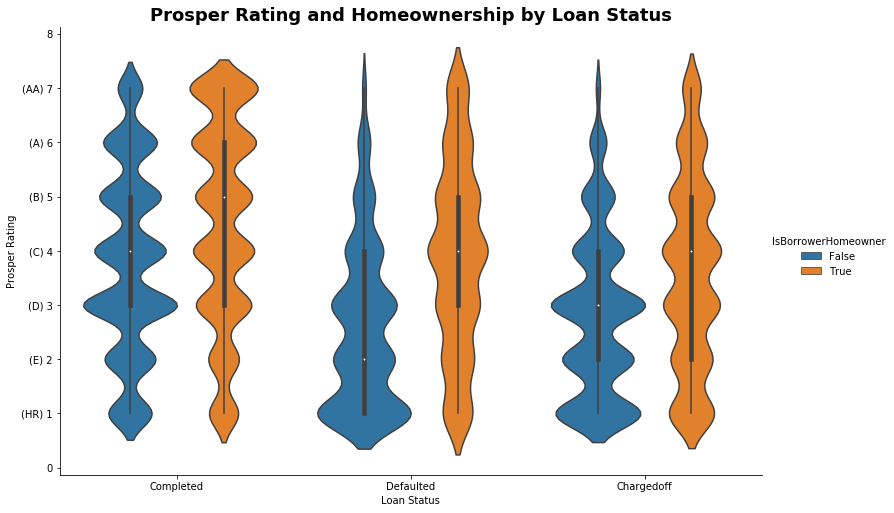

In [15]:
sb.catplot(x="LoanStatus", y="ProsperRating_numeric", hue="IsBorrowerHomeowner",split = False,
           kind="violin", data=df2, height =7, aspect = 1.5);
plt.yticks([8, 7, 6, 5, 4, 3, 2, 1, 0],['8', '(AA) 7', '(A) 6', '(B) 5', '(C) 4', '(D) 3', '(E) 2', '(HR) 1', '0']);
plt.ylabel('Prosper Rating')
plt.xlabel('Loan Status');
plt.title('Prosper Rating and Homeownership by Loan Status', fontdict=title).set_position([.5,1.1])

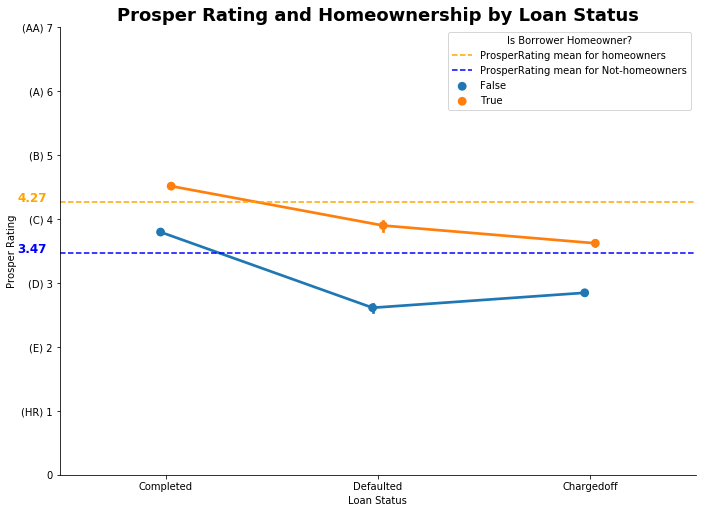

In [16]:
sb.catplot(x="LoanStatus", y="ProsperRating_numeric", hue="IsBorrowerHomeowner", kind="point",
           dodge = True, data=df2, legend=False, height = 7, aspect = 1.4)
yes = round(df2.query('IsBorrowerHomeowner == True').ProsperRating_numeric.mean(), 2)
no = round(df2.query('IsBorrowerHomeowner == False').ProsperRating_numeric.mean(), 2)
plt.axhline(y=yes, color = 'orange', linestyle = 'dashed', label='ProsperRating mean for homeowners')
plt.axhline(y = no, color = 'blue', linestyle = 'dashed', label='ProsperRating mean for Not-homeowners')
plt.text(-0.7, yes, yes, color='orange', fontdict=fontdict)
plt.text(-0.7, no, no, color='b', fontdict=fontdict)
plt.legend(title='Is Borrower Homeowner?')
plt.yticks([7, 6, 5, 4, 3, 2, 1, 0],['(AA) 7', '(A) 6', '(B) 5', '(C) 4', '(D) 3', '(E) 2', '(HR) 1', '0'])
plt.ylabel('Prosper Rating')
plt.xlabel('Loan Status');
plt.title('Prosper Rating and Homeownership by Loan Status', fontdict=title).set_position([.5,1.1])

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!